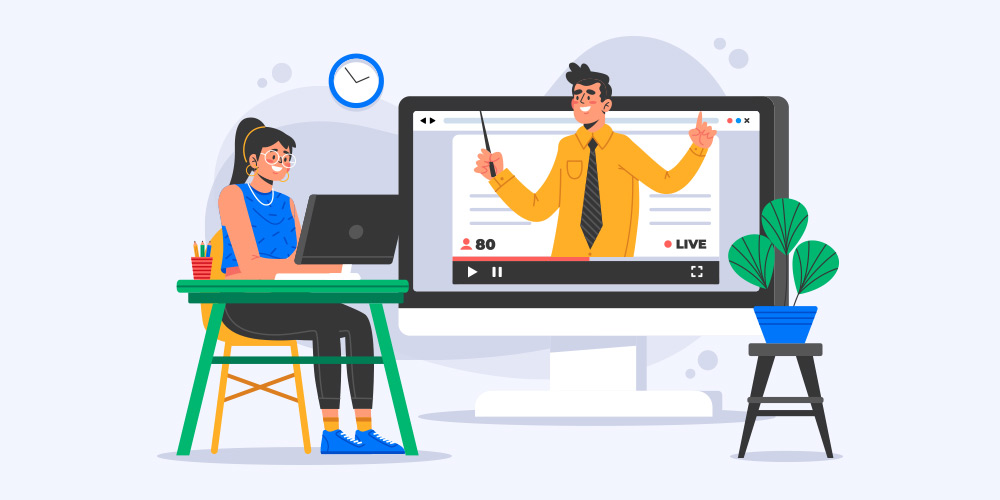

In [3]:
%matplotlib inline
from IPython.display import Image

Image(filename='Ai_project.jpg')


# *The dataset is related on Online Education System*
* Accquired through a online survey




In [4]:
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'sklearn'

In [5]:
# read the dataset
df=pd.read_csv('edu_dataset.csv')

In [6]:
df.head(10)

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
5,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,1,Theory,2,Bad
6,Male,Urban,Under Graduate,19,5,Laptop,Middle Class,5,5,No,...,3,Yes,Yes,yes,81-90,4,3,Both,6,Average
7,Male,Urban,Under Graduate,17,4,Laptop,Middle Class,4,4,Yes,...,6,No,Yes,No,61-70,3,3,Practical,6,Average
8,Female,Urban,Under Graduate,19,5,Laptop,Middle Class,4,4,No,...,2,No,Yes,yes,81-90,4,1,Both,9,Bad
9,Female,Rural,Under Graduate,20,9,Laptop,Middle Class,4,3,No,...,2,No,No,No,81-90,3,2,Theory,6,Average


### Lets check what the columns mentioned in the dataset says

* 1.Gender – Male, Female.
* 2.Home Location – Rural, Urban
* 3.Level of Education – Post Graduate, School, Under Graduate
* 4.Age – Years
* 5.Number of Subjects – 1- 20
* 6.Device type used to attend classes – Desktop, Laptop, Mobile
* 7.Economic status – Middle Class, Poor, Rich
* 8.Family size – 1 -10
* 9.Internet facility in your locality – Number scale (Very Bad to Very Good)
* 10.Are you involved in any sports? – Yes, No
* 11.Do elderly people monitor you? – Yes, No
* 12.Study time – Hours
* 13.Sleep time – Hours
* 14.Time spent on social media – Hours
* 15.Interested in Gaming? – Yes, No
* 16.Have separate room for studying? – Yes, No
* 17.Engaged in group studies? – Yes, No
* 18.Average marks scored before pandemic in traditional classroom – range
* 19.Your interaction in online mode - Number scale (Very Bad to Very Good)
* 20.Clearing doubts with faculties in online mode - Number scale (Very Bad to Very Good)
* 21.Interested in? – Practical, Theory, Both
* 22.Performance in online - Number scale (Very Bad to Very Good)
* 23.Your level of satisfaction in Online Education – Average, Bad, Good

### Checking Insights of Dataset

In [7]:
# checking the shape of Dataset
rows, cols = df.shape
print("Our dataset have",rows,"rows and",cols,"columns")

Our dataset have 1033 rows and 23 columns


In [8]:
# checking the size of Dataset, total values
df.size

23759

In [9]:
# checking the duplicate values in Dataset
df.duplicated().sum()

0

* There are no duplicate value in the dataset

In [10]:
for column in df.columns:
    print(f"Number of null values in {column}: {df[column].isnull().sum()}")

Number of null values in Gender: 0
Number of null values in Home Location: 0
Number of null values in Level of Education: 0
Number of null values in Age(Years): 0
Number of null values in Number of Subjects: 0
Number of null values in Device type used to attend classes: 0
Number of null values in Economic status: 0
Number of null values in Family size: 0
Number of null values in Internet facility in your locality: 0
Number of null values in Are you involved in any sports?: 0
Number of null values in Do elderly people monitor you?: 0
Number of null values in Study time (Hours): 0
Number of null values in Sleep time (Hours): 0
Number of null values in Time spent on social media (Hours): 0
Number of null values in Interested in Gaming?: 0
Number of null values in Have separate room for studying?: 0
Number of null values in Engaged in group studies?: 0
Number of null values in Average marks scored before pandemic in traditional classroom: 0
Number of null values in Your interaction in onli

* There are total 23 columns in my Dataset.
* In which 10 are numerical columns and 13 are categorical columns.
* There are no missing missing values in dataset.


In [11]:
# checking the detail info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [12]:
# checking detail describetion of Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age(Years),1033.0,19.798645,3.199158,9.0,18.0,19.0,20.0,40.0
Number of Subjects,1033.0,7.034850,2.810340,1.0,6.0,7.0,8.0,20.0
Family size,1033.0,4.413359,1.236750,2.0,4.0,4.0,5.0,10.0
Internet facility in your locality,1033.0,3.586641,1.026063,1.0,3.0,4.0,4.0,5.0
Study time (Hours),1033.0,4.325266,2.134233,1.0,3.0,4.0,6.0,10.0
Sleep time (Hours),1033.0,6.947725,1.324039,1.0,6.0,7.0,8.0,10.0
Time spent on social media (Hours),1033.0,2.636980,1.859625,1.0,1.0,2.0,3.0,10.0
Your interaction in online mode,1033.0,2.930300,1.105387,1.0,2.0,3.0,4.0,5.0
Clearing doubts with faculties in online mode,1033.0,2.833495,1.163629,1.0,2.0,3.0,4.0,5.0
Performance in online,1033.0,6.696031,1.920048,2.0,6.0,7.0,8.0,10.0


* The decribe function gives the values of mean,median,mode,sd for numerical columns
* we can see the range of students who used the online education are between 9 to 40..
* the study time are between 1 to 10..
* the sleep time are between 1 to 10.

In [13]:
#for categorical columns
df.describe(include='object').T

,count,unique,top,freq
Gender,1033,2,Male,614
Home Location,1033,2,Urban,679
Level of Education,1033,3,Under Graduate,817
Device type used to attend classes,1033,3,Laptop,672
Economic status,1033,3,Middle Class,954
Are you involved in any sports?,1033,2,No,663
Do elderly people monitor you?,1033,2,Yes,545
Interested in Gaming?,1033,2,Yes,560
Have separate room for studying?,1033,2,Yes,608
Engaged in group studies?,1033,2,No,616


### Removing Unimportant Columns

In [14]:
remove_columns = ['Home Location', 'Economic status', 'Do elderly people monitor you?', 'Engaged in group studies?', 'Have separate room for studying?',]
df.drop(remove_columns, axis=1,inplace=True)
df.columns

Index(['Gender', 'Level of Education', 'Age(Years)', 'Number of Subjects',
       'Device type used to attend classes', 'Family size',
       'Internet facility in your locality', 'Are you involved in any sports?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education'],
      dtype='object')

In [15]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

In [16]:
# Compute the correlation matrix
correlation_matrix = df_numeric.corr()
correlation_matrix

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


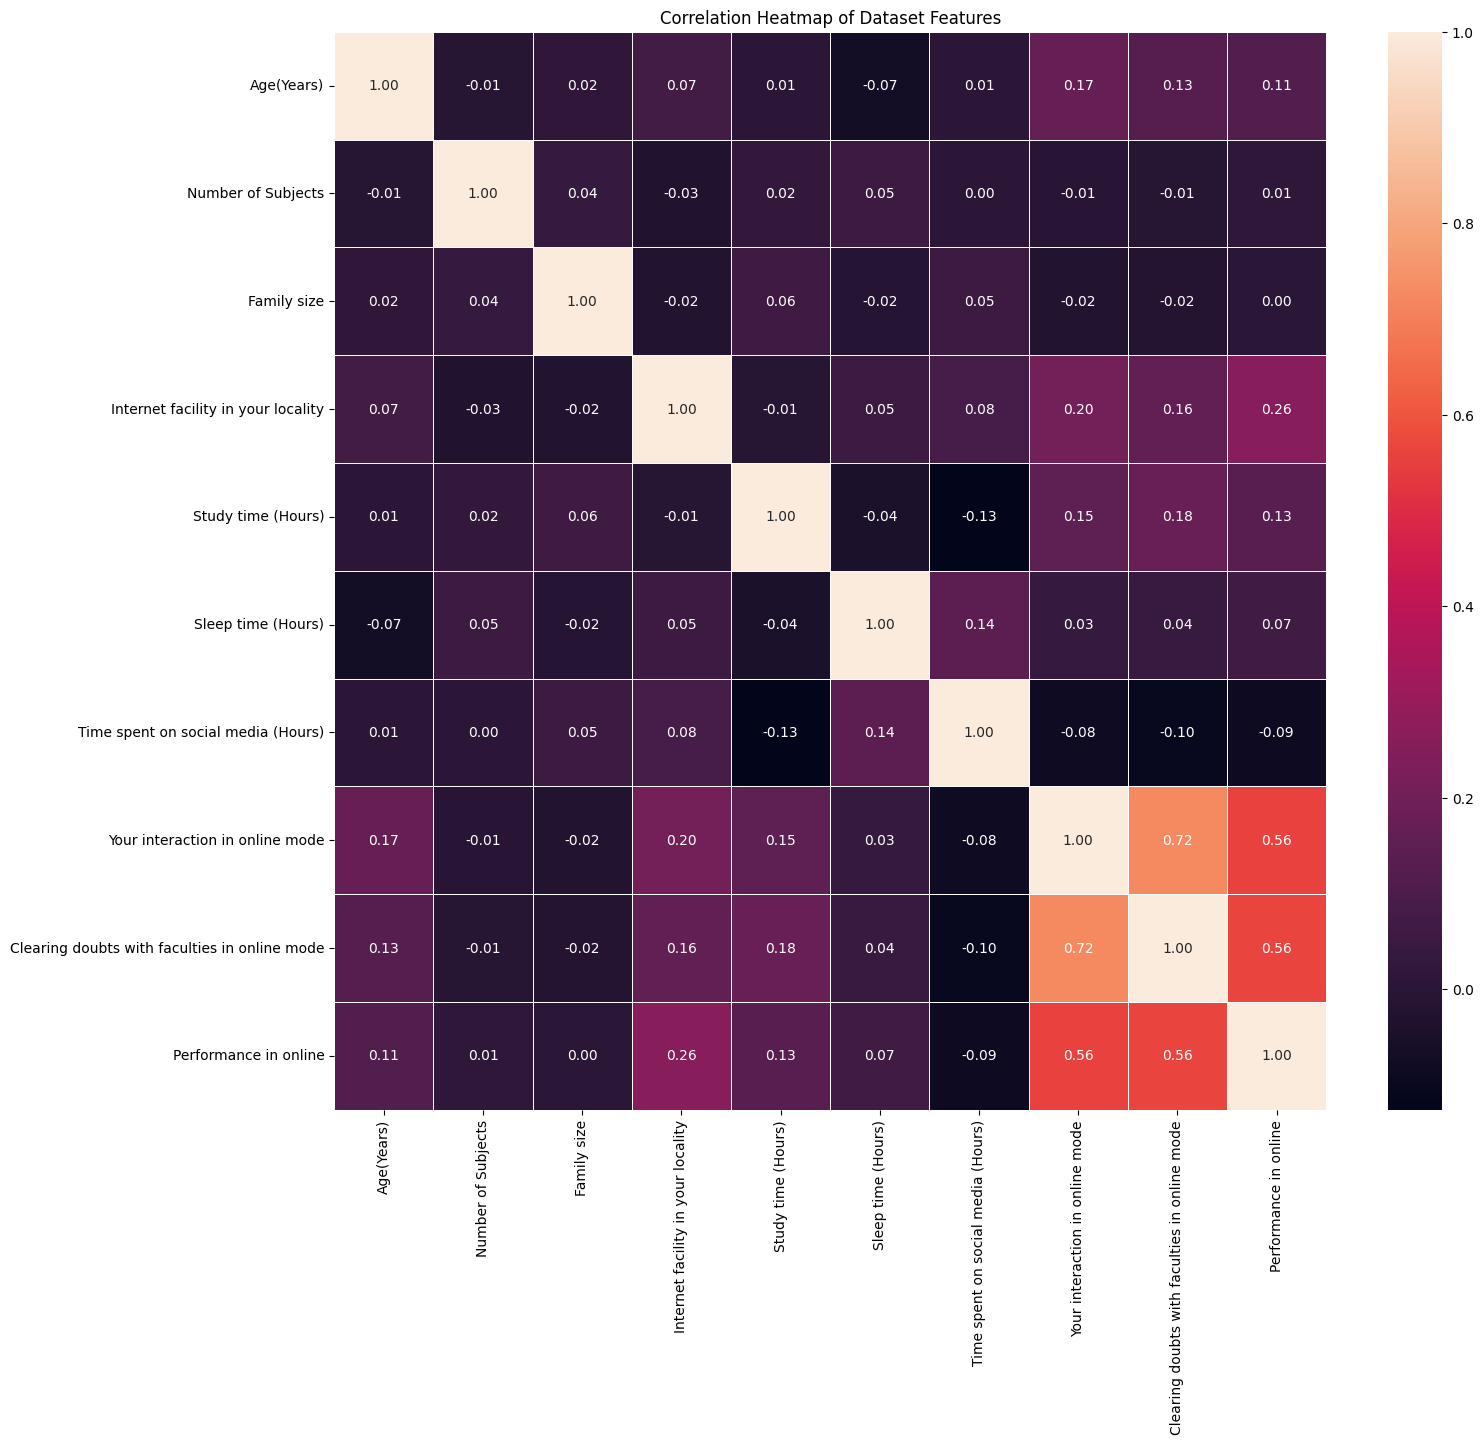

In [17]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cbar="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Dataset Features")
plt.show()

### Short report of our data

In [18]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        maxval = df[col].max()
        minval = df[col].min()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,maxval,minval,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','maxval','minval', 'duplicates']
    return data_profile_finding


In [19]:
data_proflileing(df)

,column,dtype,nunique,null,maxval,minval,duplicates
0,Gender,object,2,0,Male,Female,1031
1,Level of Education,object,3,0,Under Graduate,Post Graduate,1030
2,Age(Years),int64,24,0,40,9,1009
3,Number of Subjects,int64,20,0,20,1,1013
4,Device type used to attend classes,object,3,0,Mobile,Desktop,1030
5,Family size,int64,9,0,10,2,1024
6,Internet facility in your locality,int64,5,0,5,1,1028
7,Are you involved in any sports?,object,2,0,Yes,No,1031
8,Study time (Hours),int64,10,0,10,1,1023
9,Sleep time (Hours),int64,10,0,10,1,1023


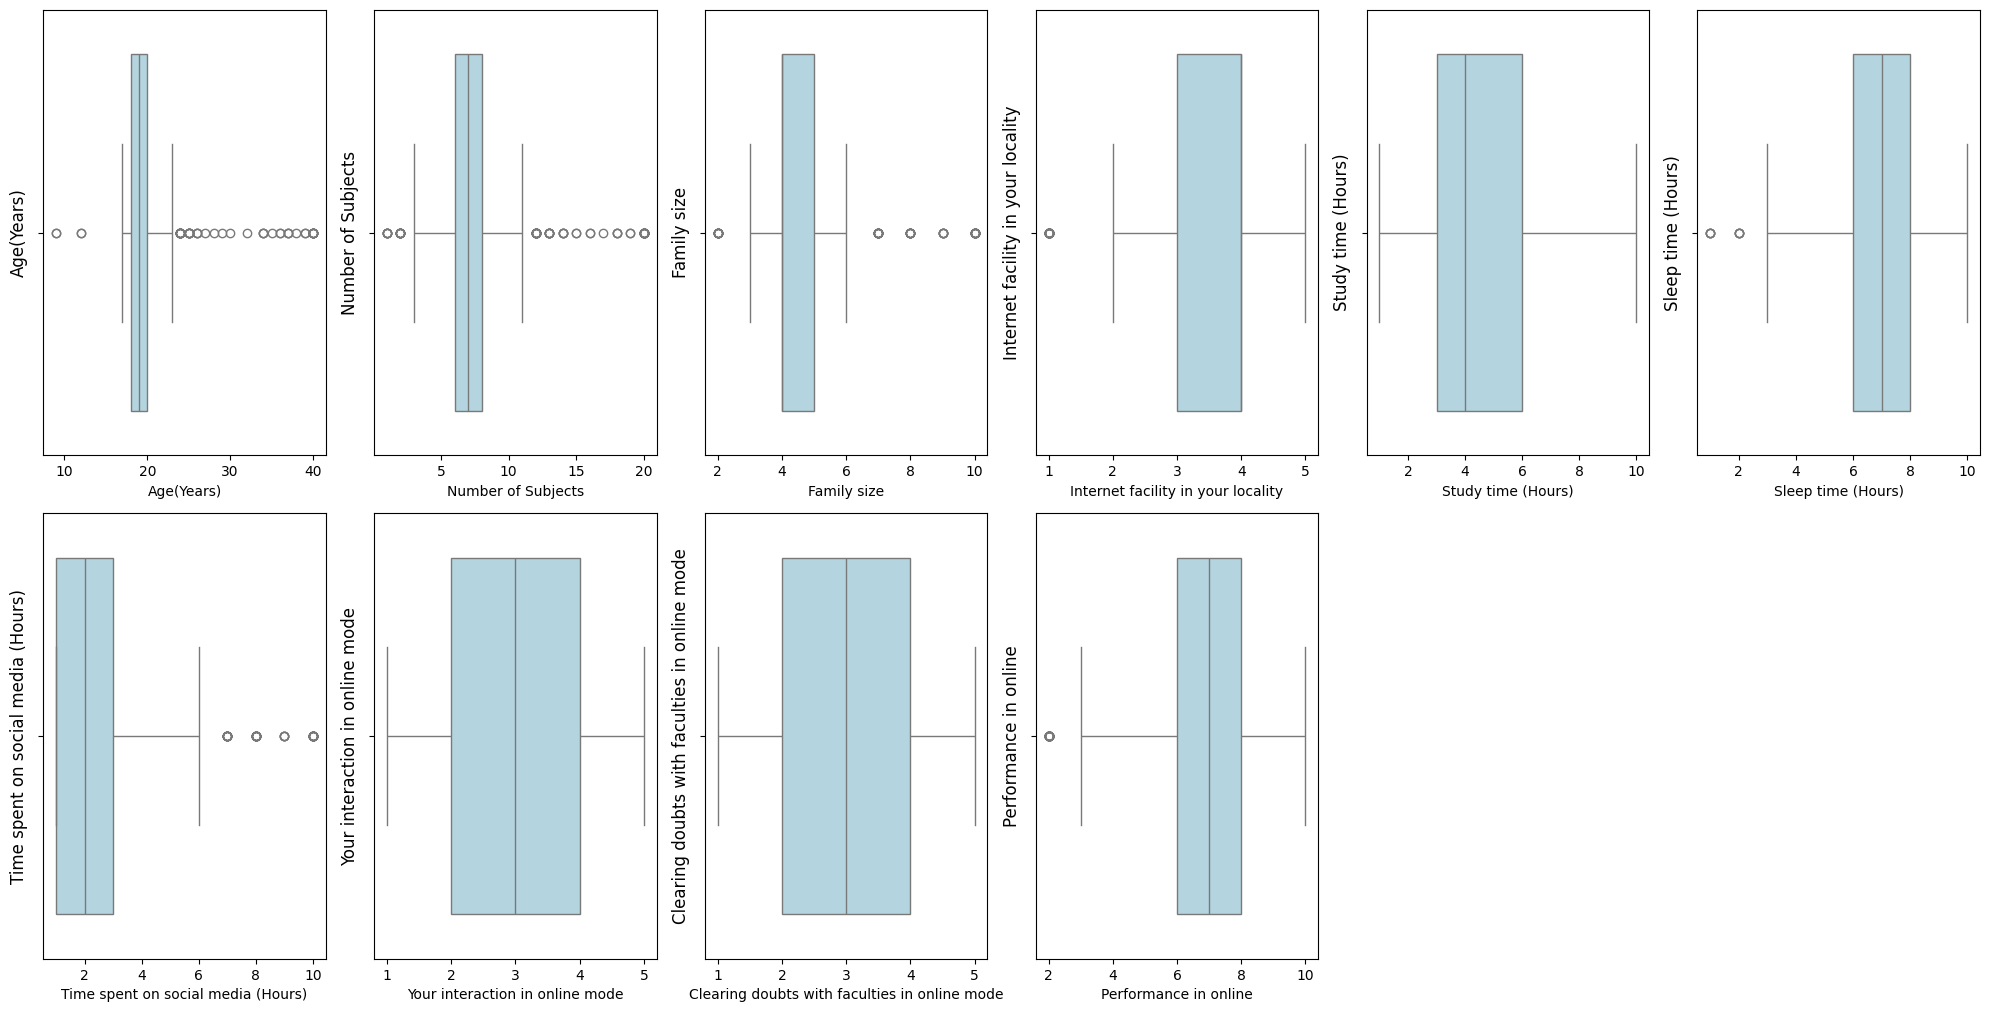

In [20]:
# Set the size of the figure
plt.figure(figsize=(20, 40))
# create a list of columns that are float or int type
num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
# Create subplots for each column
for i, column in enumerate(num_cols):
    plt.subplot(8, 6, i+1) # Define the subplot grid
    sns.boxplot(data=df[column], color='lightblue', orient='h') # Create the boxplot
    plt.ylabel(column, fontsize=12) # Set the y-label as the column name
    plt.tight_layout() # Adjust the spacing between the subplots

plt.show() # Display the plot

# *Resolving Outliers in numerical columns*

In [21]:
df['Age(Years)'].max(), df['Age(Years)'].min()

(40, 9)

<Axes: xlabel='Age(Years)'>

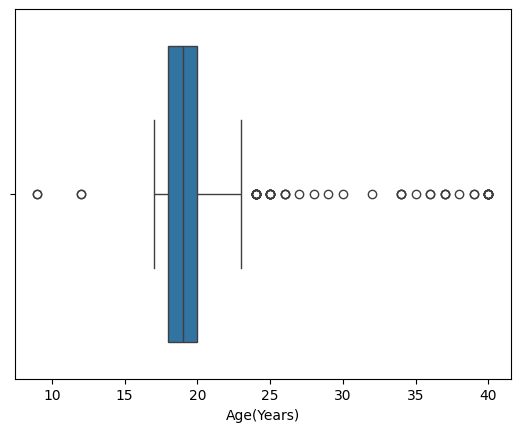

In [22]:
sns.boxplot(x=df['Age(Years)']) # boxplot

<Axes: xlabel='Age(Years)'>

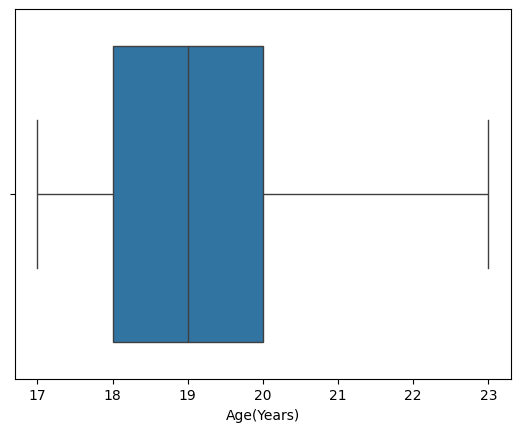

In [23]:
# calculate the IQR for the 'occurance' column
q1 = df['Age(Years)'].quantile(0.25)
q3 = df['Age(Years)'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Age(Years)'] >= lower_bound) & (df['Age(Years)'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['Age(Years)']) # boxplot

In [24]:
df['Age(Years)'].max(), df['Age(Years)'].min()

(23, 17)

In [25]:
df['Number of Subjects'].max(), df['Number of Subjects'].min()

(20, 1)

<Axes: xlabel='Number of Subjects'>

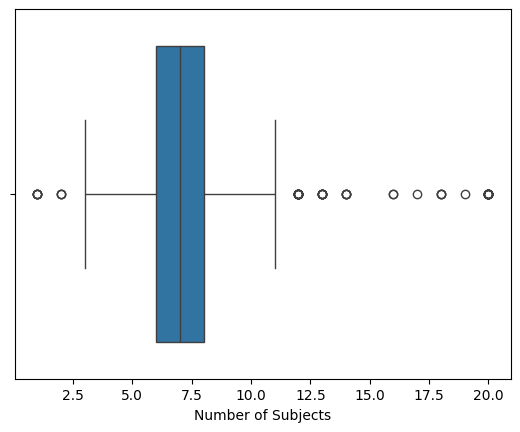

In [26]:
sns.boxplot(x=df['Number of Subjects']) # boxplot

<Axes: xlabel='Number of Subjects'>

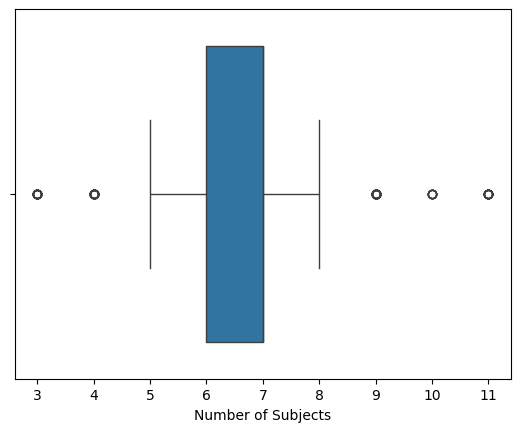

In [27]:
# calculate the IQR for the 'occurance' column
q1 = df['Number of Subjects'].quantile(0.25)
q3 = df['Number of Subjects'].quantile(0.75)
iqr = q3 - q1

# find the outliers using the IQR method
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Number of Subjects'] >= lower_bound) & (df['Number of Subjects'] <= upper_bound)]


# visualize outliers using different sns plots
sns.boxplot(x=df['Number of Subjects']) # boxplot

In [28]:
df['Number of Subjects'].max(), df['Number of Subjects'].min()

(11, 3)

## *Exploratory Analysis & Visualizations - EDA*

#### 1. How Gender impacts Online Education?

In [29]:
df['Gender'].value_counts()

Gender
Male      542
Female    378
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

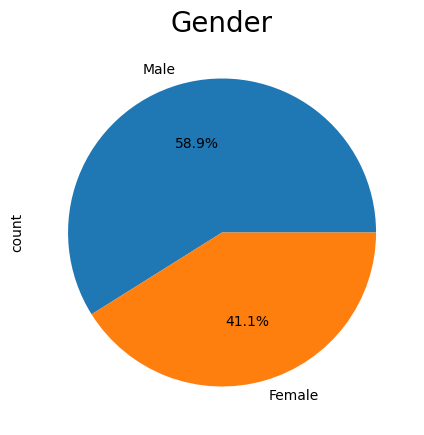

In [30]:
# plotting the pie chart.
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')    # autopct display the percent value using string formatting
plt.title('Gender',size=20)

#### Insight:
* Male students show higher adaptivity (59.4%) to online education over Females(40.6)

#### 2. How Age Group impacts Online Education?

/tmp/ipykernel_5215/1761658926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Age(Years)', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns


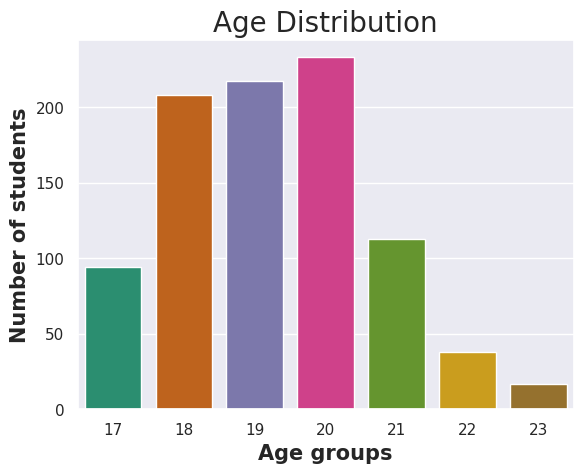

In [31]:
# plotting the count plot
sns.set(style='darkgrid')
plot = sns.countplot(x='Age(Years)', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Age Distribution', size= 20)
plt.xlabel('Age groups', weight='bold', size = 15)
plt.ylabel('Number of students', weight='bold', size = 15)
plt.show()

#### Insight :
* students are age between 17 - 21 are gives more priority to online education.
* priority to online education scales down from age of 22 onwards
* we can see the pepole between age (27-30) shows no interset for online education.

#### 3. How Education Level impacts Online Education?

In [32]:
df['Level of Education'].value_counts()

Level of Education
Under Graduate    762
School             81
Post Graduate      77
Name: count, dtype: int64

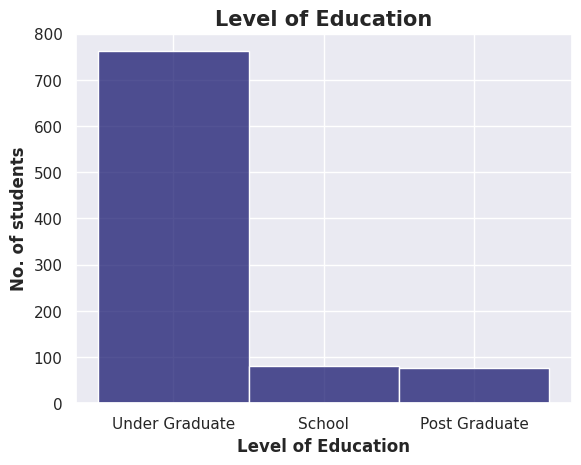

In [33]:
# plotting the Histplot
sns.histplot(df, x = df['Level of Education'], color = 'midnightblue')
plt.title('Level of Education',weight='bold', size = 15)
plt.xlabel('Level of Education',weight='bold')
plt.ylabel('No. of students',weight='bold')
plt.show()


#### Insight:
* under graduate students showed larger population in comparison with post graduate and school students... And also we see in the plot, in schooling they don't give much important to online eduction..

####  4. How device type impacts Online Education?

In [34]:
df['Device type used to attend classes'].value_counts()

Device type used to attend classes
Laptop     597
Mobile     300
Desktop     23
Name: count, dtype: int64

/tmp/ipykernel_5215/1947948810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Device type used to attend classes', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns


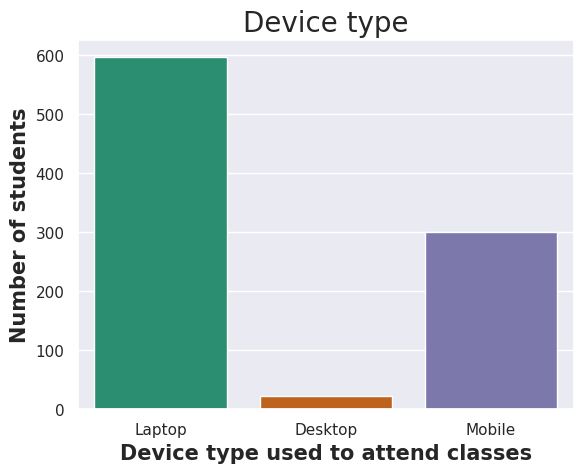

In [35]:
# plotting the count plot
sns.set(style='darkgrid')
plot = sns.countplot(x='Device type used to attend classes', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Device type', size= 20)
plt.xlabel('Device type used to attend classes', weight='bold', size= 15)
plt.ylabel('Number of students', weight='bold', size= 15)
plt.show()

### Insight:
* Laptop and Mobile is more preferred over Desktop.

####  5. Average marks scored before pandemic in traditional classroom

/tmp/ipykernel_5215/2928659481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Average marks scored before pandemic in traditional classroom', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns


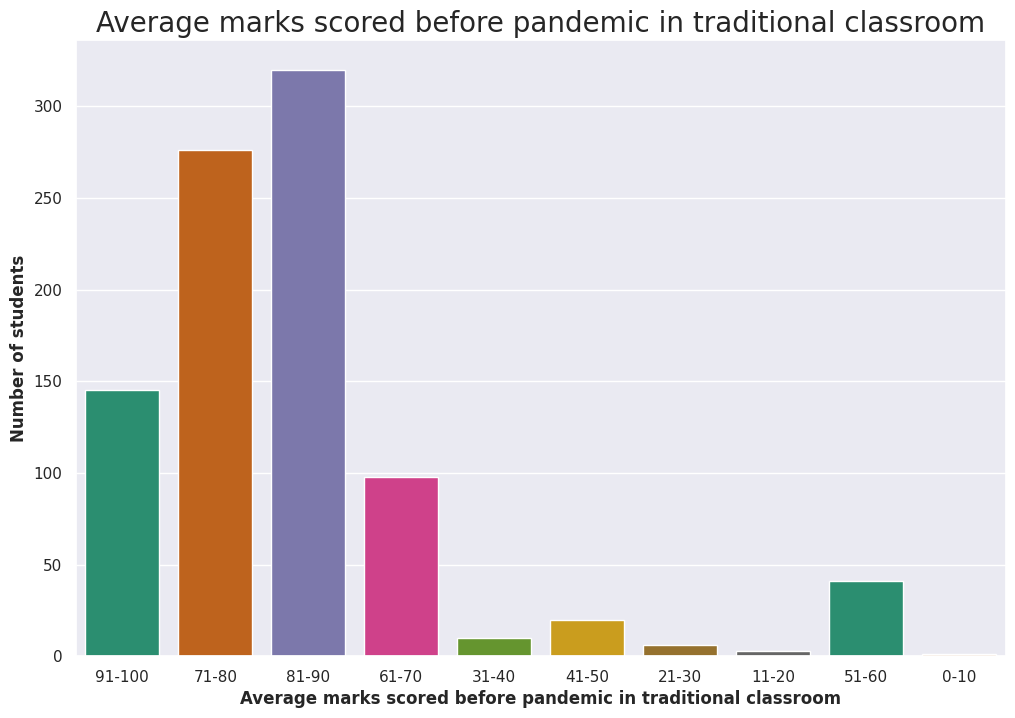

In [36]:
# plotting the count plot
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
plot = sns.countplot(x='Average marks scored before pandemic in traditional classroom', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Average marks scored before pandemic in traditional classroom', size= 20)
plt.xlabel('Average marks scored before pandemic in traditional classroom', weight='bold')
plt.ylabel('Number of students', weight='bold')
plt.show()

#### Insight:
* we see in graph most off students score (81-90) markes before pandemic

### 6.Time spend on study

/tmp/ipykernel_5215/906972319.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Study time (Hours)', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns


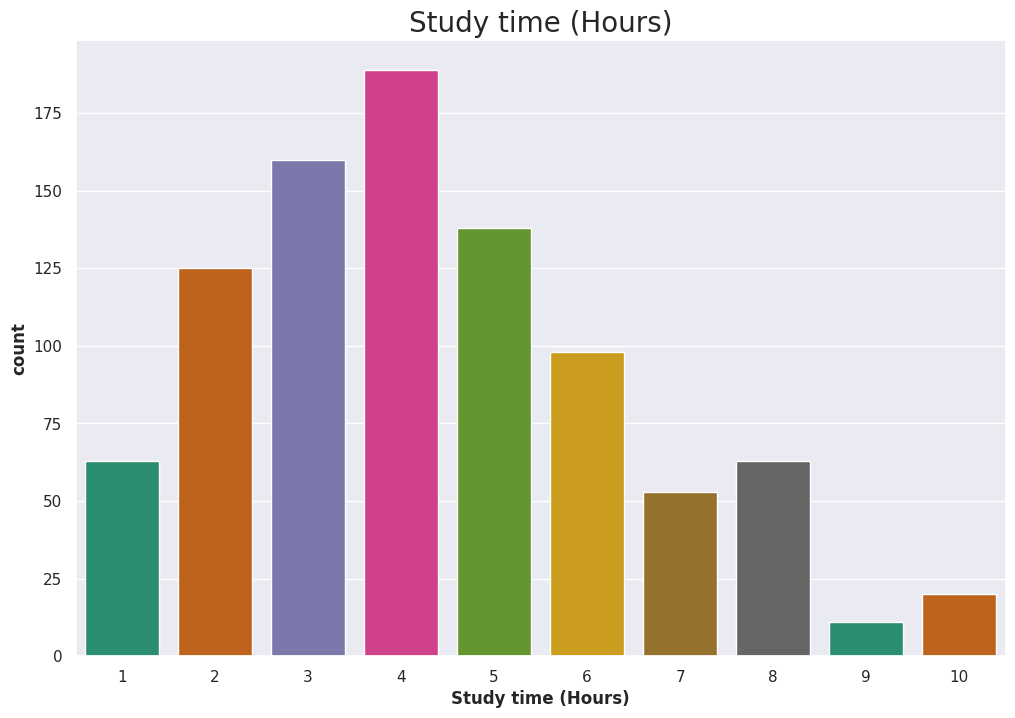

In [37]:
# plotting the count plot
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
plot = sns.countplot(x='Study time (Hours)', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Study time (Hours)', size= 20)
plt.xlabel('Study time (Hours)', weight='bold')
plt.ylabel('count', weight='bold')
plt.show()

#### Insight:
* Average time spent on studies is 3-4 hours.
* only from dataset 25 student spend maximum time on study

#### 7.  Student's Interested in what? (practical,theory,both)

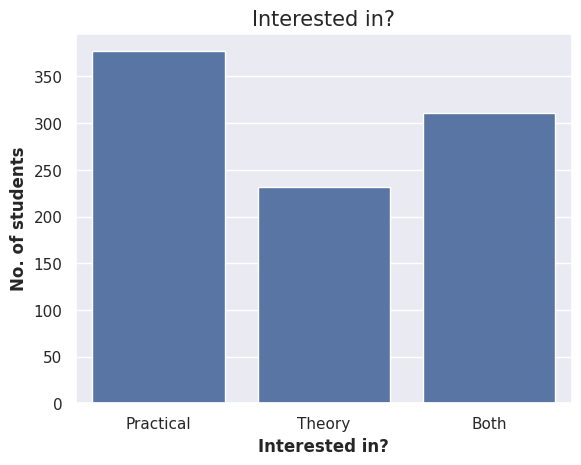

In [38]:
# using the countplot we see
sns.countplot(x=df['Interested in?'])
plt.title('Interested in?', size = 15)
plt.xlabel('Interested in?',weight='bold')
plt.ylabel('No. of students',weight='bold')
plt.show()

#### Insight:
* during online learning students interested to do practical over a theory but also many students interested in both practical as well as theory..

####  8.  The level of satisfaction in Online Education.

Text(0.5, 1.0, 'Level of satisfactions in Online Education')

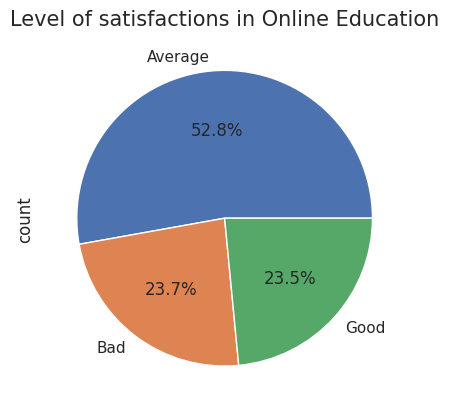

In [39]:
# plotting the pia chart.
df['Your level of satisfaction in Online Education'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')    # autopct display the percent value using string formatting
plt.title('Level of satisfactions in Online Education',size=15)

#### Insight:
* Average number of  students were satisfied with the level of peer interaction that happened in online learning uptoo 52.8%.

## *Some more common visualization*

/tmp/ipykernel_5215/4129435536.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(df['Device type used to attend classes'], aspect=2, kde=True, palette='pastel')   # Imbalance distribution


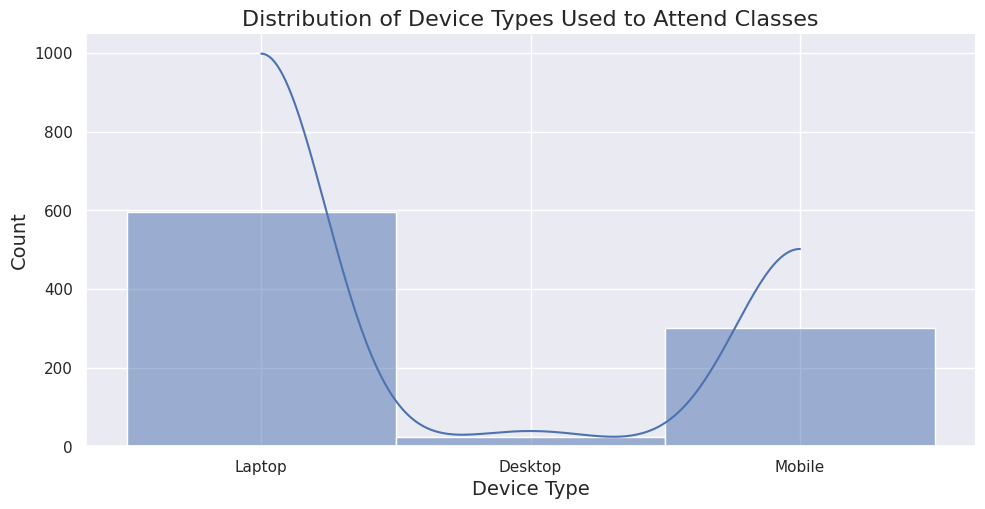

In [40]:
# Create a distribution plot (displot)
sns.displot(df['Device type used to attend classes'], aspect=2, kde=True, palette='pastel')   # Imbalance distribution

# Set plot title and labels
plt.title('Distribution of Device Types Used to Attend Classes', fontsize=16)
plt.xlabel('Device Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

/tmp/ipykernel_5215/3128130080.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Age(Years)', y='Study time (Hours)', data=df, palette='viridis', alpha=0.7)


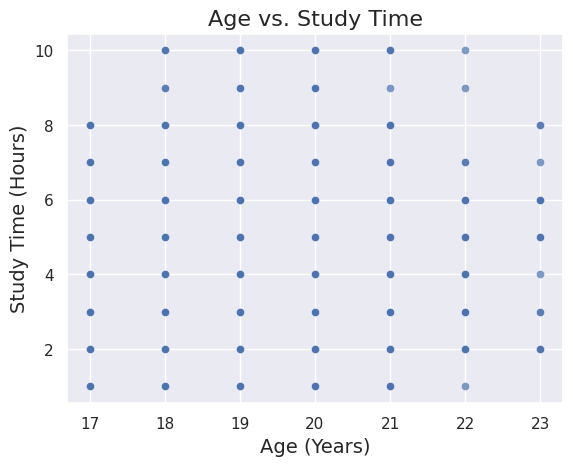

In [41]:
# Create a scatter plot
sns.scatterplot(x='Age(Years)', y='Study time (Hours)', data=df, palette='viridis', alpha=0.7)

# Set plot title and labels
plt.title('Age vs. Study Time', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Study Time (Hours)', fontsize=14)

# Show the plot
plt.show()


/tmp/ipykernel_5215/1507991487.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Time spent on social media (Hours)', y='Study time (Hours)', data=df, palette='viridis', alpha=0.7)


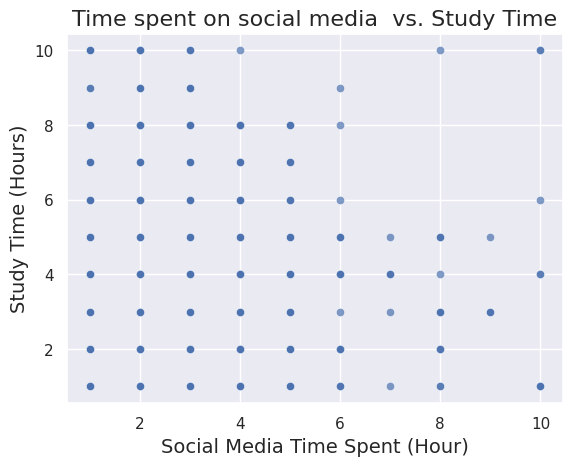

In [42]:
# Create a scatter plot
sns.scatterplot(x='Time spent on social media (Hours)', y='Study time (Hours)', data=df, palette='viridis', alpha=0.7)

# Set plot title and labels
plt.title('Time spent on social media  vs. Study Time', fontsize=16)
plt.xlabel('Social Media Time Spent (Hour)', fontsize=14)
plt.ylabel('Study Time (Hours)', fontsize=14)

# Show the plot
plt.show()


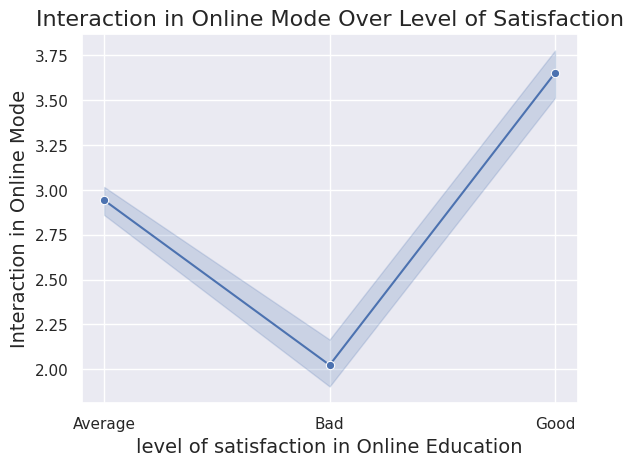

In [43]:
# Create a line plot
sns.lineplot(x='Your level of satisfaction in Online Education', y='Your interaction in online mode', data=df, marker='o', color='b')

# Set plot title and labels
plt.title('Interaction in Online Mode Over Level of Satisfaction', fontsize=16)
plt.xlabel('level of satisfaction in Online Education', fontsize=14)
plt.ylabel('Interaction in Online Mode', fontsize=14)

# Show the plot
plt.show()

In [44]:
categorical_columns = df.select_dtypes(include=['object'])

In [45]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


df.head()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
print(len(df.columns))

In [ ]:
# Select all features except the target feature for X
X = df.drop('Your level of satisfaction in Online Education', axis=1)
# Select the target feature for y
y = df['Your level of satisfaction in Online Education']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Use elbow method to find optimal number of clusters
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
optimal_k = 3  # replace with your identified optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(X)


In [ ]:
# Add cluster information to the original DataFrame
df['Cluster'] = clusters_optimal
df.head()

In [ ]:
df['Cluster'].value_counts()

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age(Years)', y='Study time (Hours)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)

# Set plot title and labels
plt.title(f'K-Means Clustering (k={optimal_k}): Scatter Plot of Clusters', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Study Time', fontsize=14)

# Show the plot
plt.show()